Importing All the basic libraries required
-------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load the dataset into a pandas dataframe
-------------

In [3]:
df = pd.read_csv('/Users/manes/Desktop/Assignments and files/Sem 4/ML Lab/datasets/Lab_assignments/ML_Project/customer-churning-main/customer-churn-prediction-2020/train.csv')
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [4]:
df['total_intl_calls'].max()

20

In [5]:
print('Shape of data{}'.format(df.shape))
print('Number of rows:{}'.format(df.shape[0]))
print('Number of rows:{}'.format(df.shape[1]))
df.info()

Shape of data(4250, 20)
Number of rows:4250
Number of rows:20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null  

In [6]:
df.drop(columns=['account_length','state', 'area_code'] , axis=1 , inplace=True)

In [7]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

In [8]:
# Preparing Table
a = round(df['churn'].value_counts()/len(df['churn']),2)
churn_ratio=  pd.DataFrame(a).T 
churn_ratio = churn_ratio.rename(columns={'no':'Not Churn' , 'yes':'Churn'})
churn_ratio 


,Not Churn,Churn
churn,0.86,0.14


Missings And duplicates values
---

In [9]:
print(df.isna().sum().sort_values(ascending = False))
print('duplicate values in df' ,df.duplicated().sum() )
print('duplicates dropped')

international_plan               0
total_night_minutes              0
number_customer_service_calls    0
total_intl_charge                0
total_intl_calls                 0
total_intl_minutes               0
total_night_charge               0
total_night_calls                0
total_eve_charge                 0
voice_mail_plan                  0
total_eve_calls                  0
total_eve_minutes                0
total_day_charge                 0
total_day_calls                  0
total_day_minutes                0
number_vmail_messages            0
churn                            0
dtype: int64
duplicate values in df 0
duplicates dropped


Filtering Numericals and Categoricals columns:
---------

In [10]:
df.columns

Index(['international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [11]:
categ_columns = []
for col in df.columns:
	if df[col].nunique()<10:
		categ_columns.append(col) 
        
print('categ numericals columns are {}'.format(categ_columns))

Num_cols = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge' ]
print('nums numericals columns are {}'.format(Num_cols))

categ numericals columns are ['international_plan', 'voice_mail_plan', 'churn']
nums numericals columns are ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']


In [12]:
df.nunique().sort_values()

international_plan                  2
churn                               2
voice_mail_plan                     2
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
total_day_calls                   120
total_eve_calls                   123
total_night_calls                 128
total_intl_minutes                168
total_intl_charge                 168
total_night_charge                992
total_eve_charge                 1572
total_night_minutes              1757
total_eve_minutes                1773
total_day_minutes                1843
total_day_charge                 1843
dtype: int64

Exploratory Data Analysis
-----------

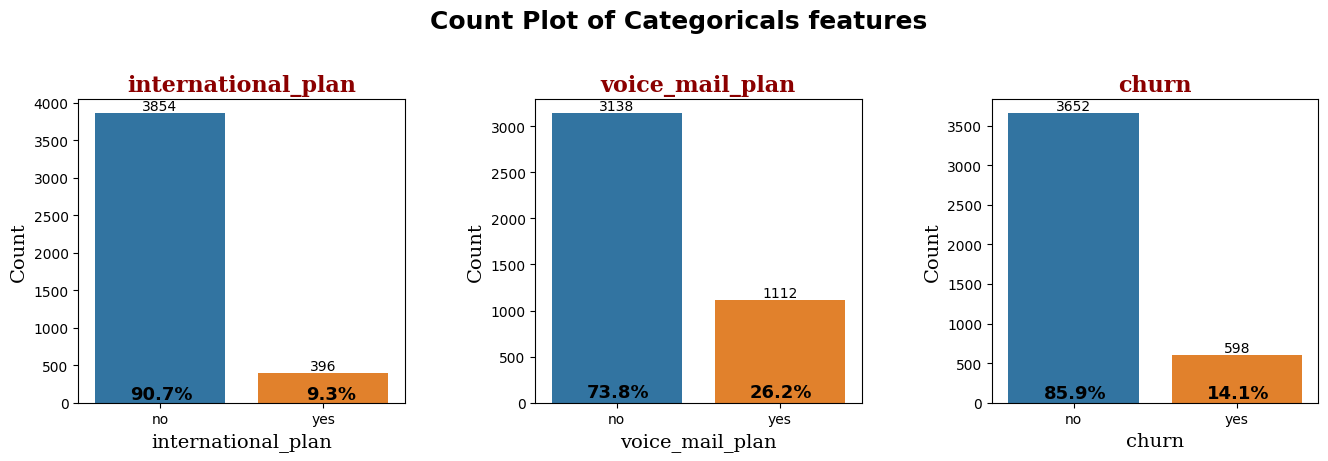

In [13]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categ_columns):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(3, 3, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{columns}', fontdict=axlab_dict)
    ax1.set_ylabel('Count', fontdict=axlab_dict)
    ax1.bar_label(ax1.containers[0])

In [14]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

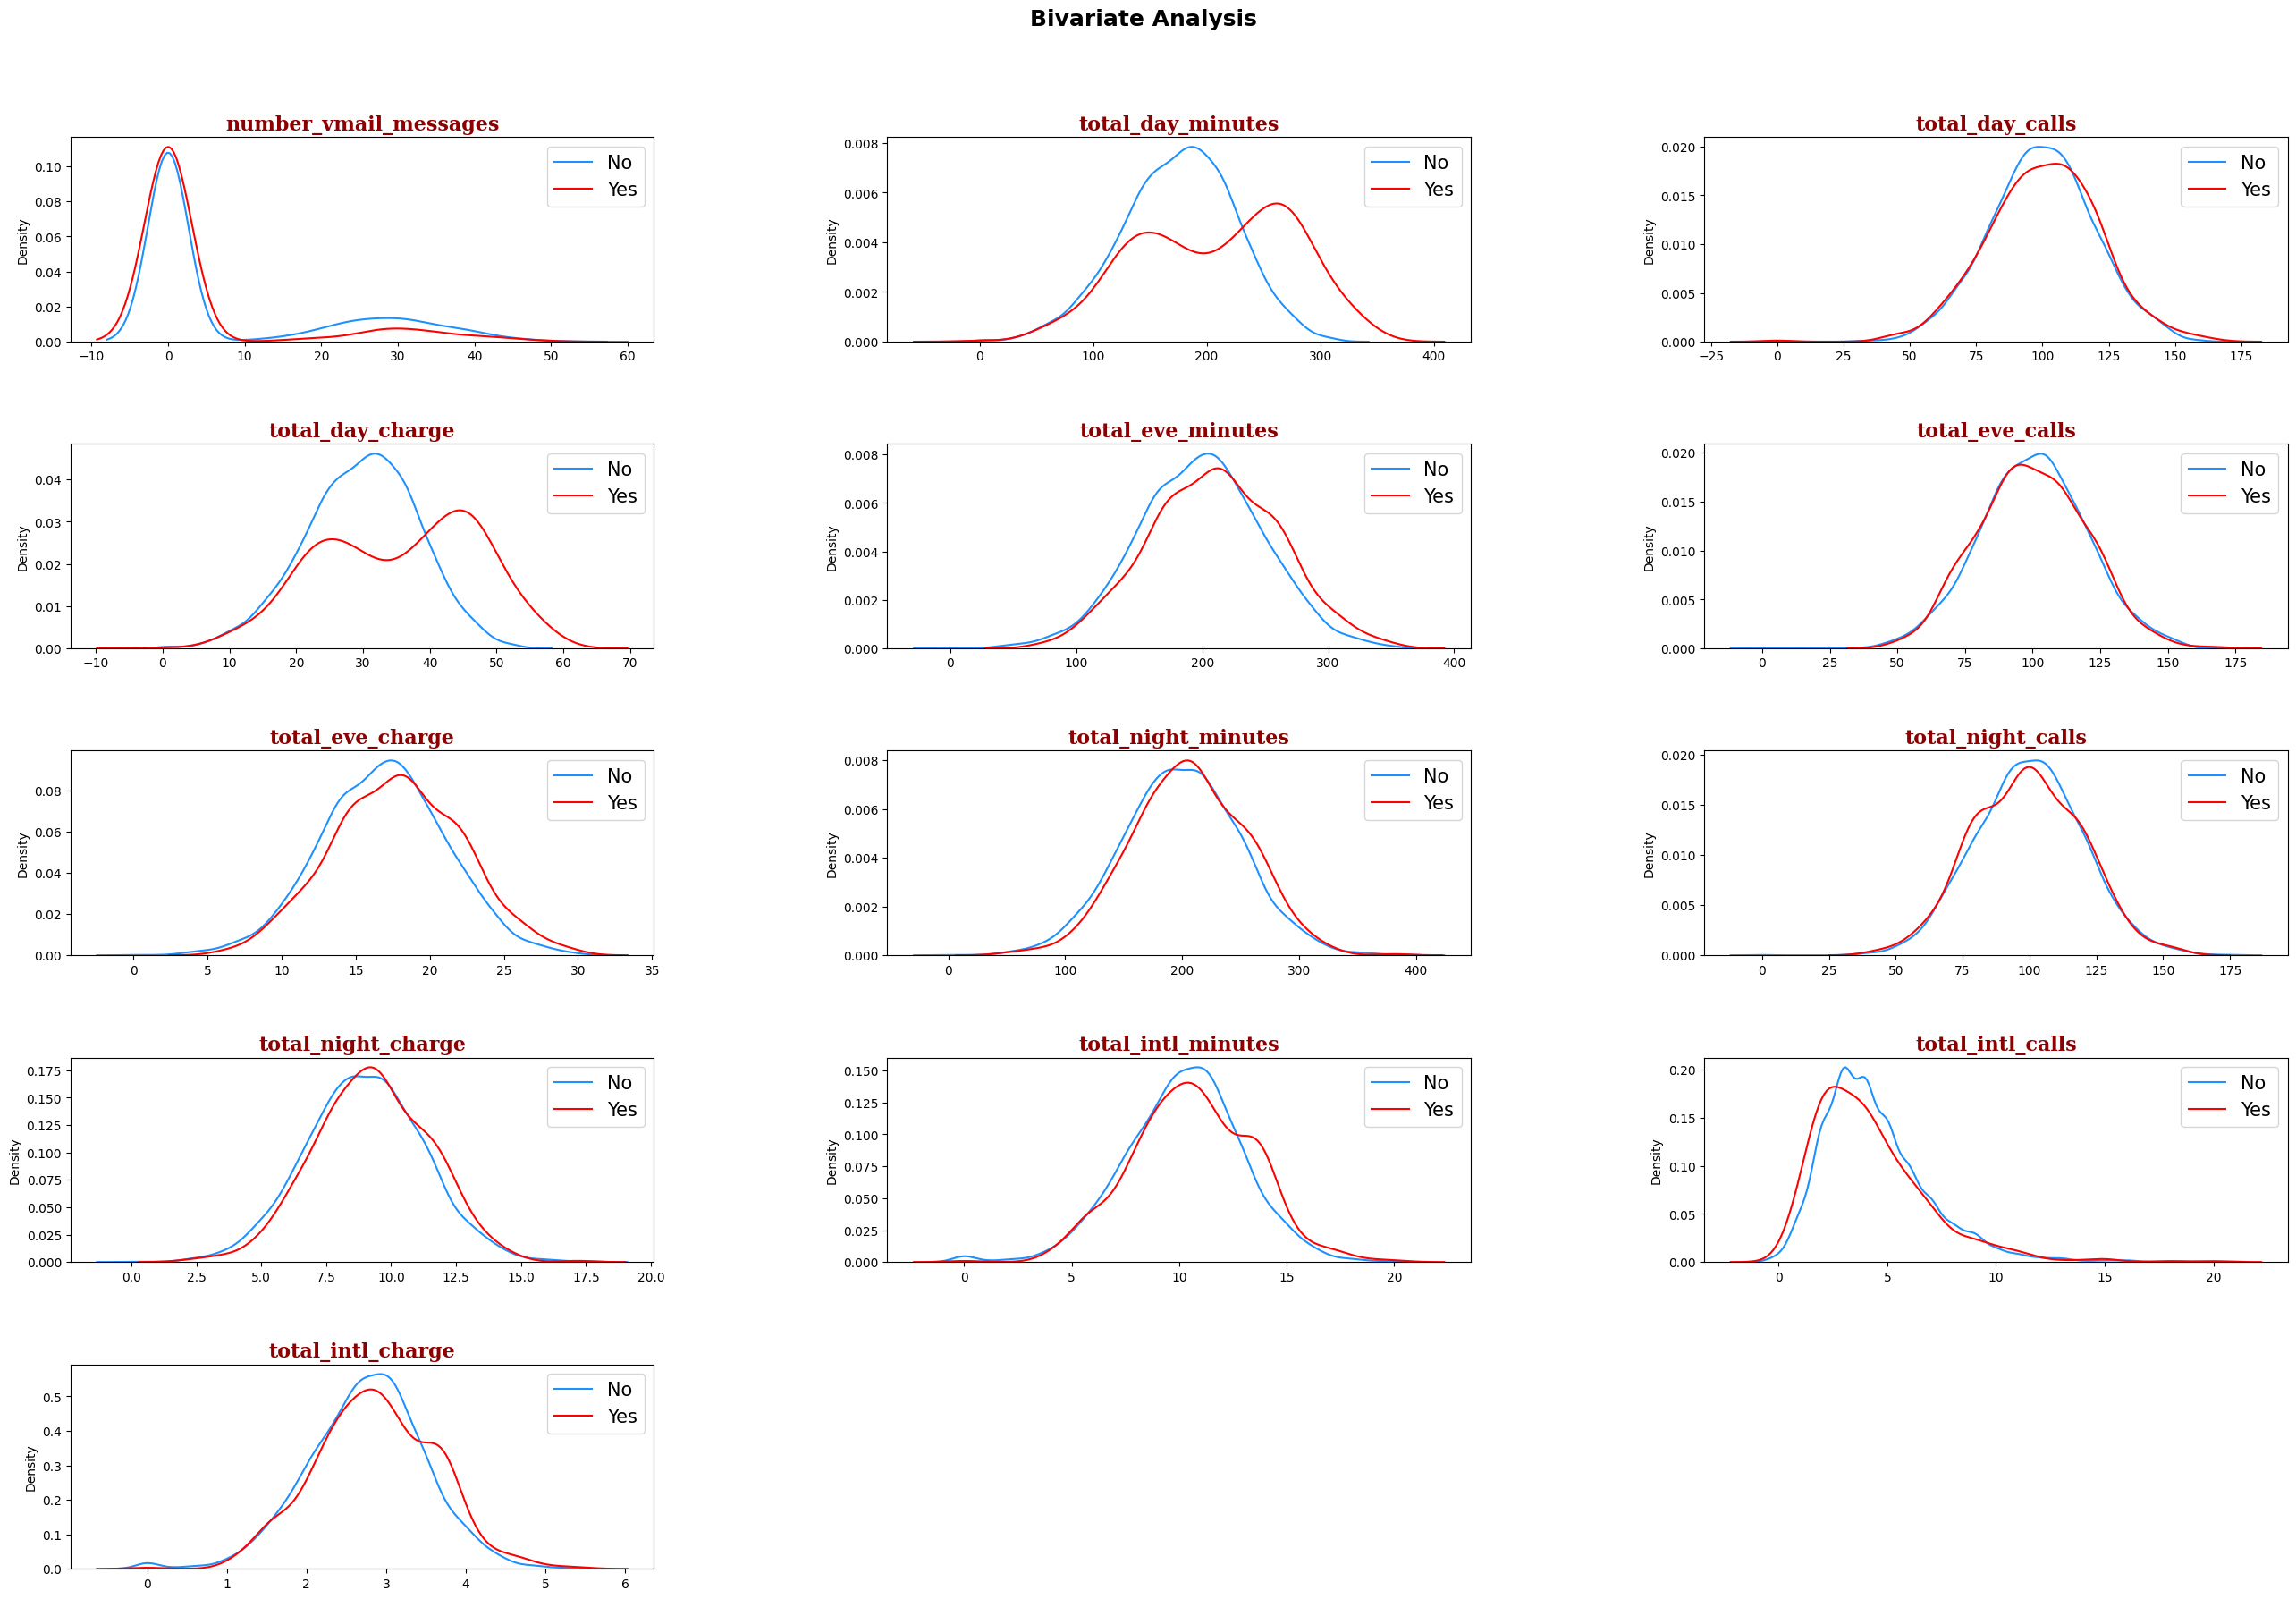

In [18]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(6, 3, i+1)
    
    sns.distplot(x =df[df['churn']=='no'][col],  color='dodgerblue' , ax=a ,  hist =False)
    sns.distplot(x =df[df['churn']=='yes'][col],  color='red' , ax=a , hist =False) 
    a.set_title(col , fontdict=axtitle_dict)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15)

Outliers Detection
--------

In [19]:
df_num = df[Num_cols]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

number_vmail_messages    True
total_day_minutes        True
total_day_calls          True
total_day_charge         True
total_eve_minutes        True
total_eve_calls          True
total_eve_charge         True
total_night_minutes      True
total_night_calls        True
total_night_charge       True
total_intl_minutes       True
total_intl_calls         True
total_intl_charge        True
dtype: bool

Visualization of outliers using box plot
-----

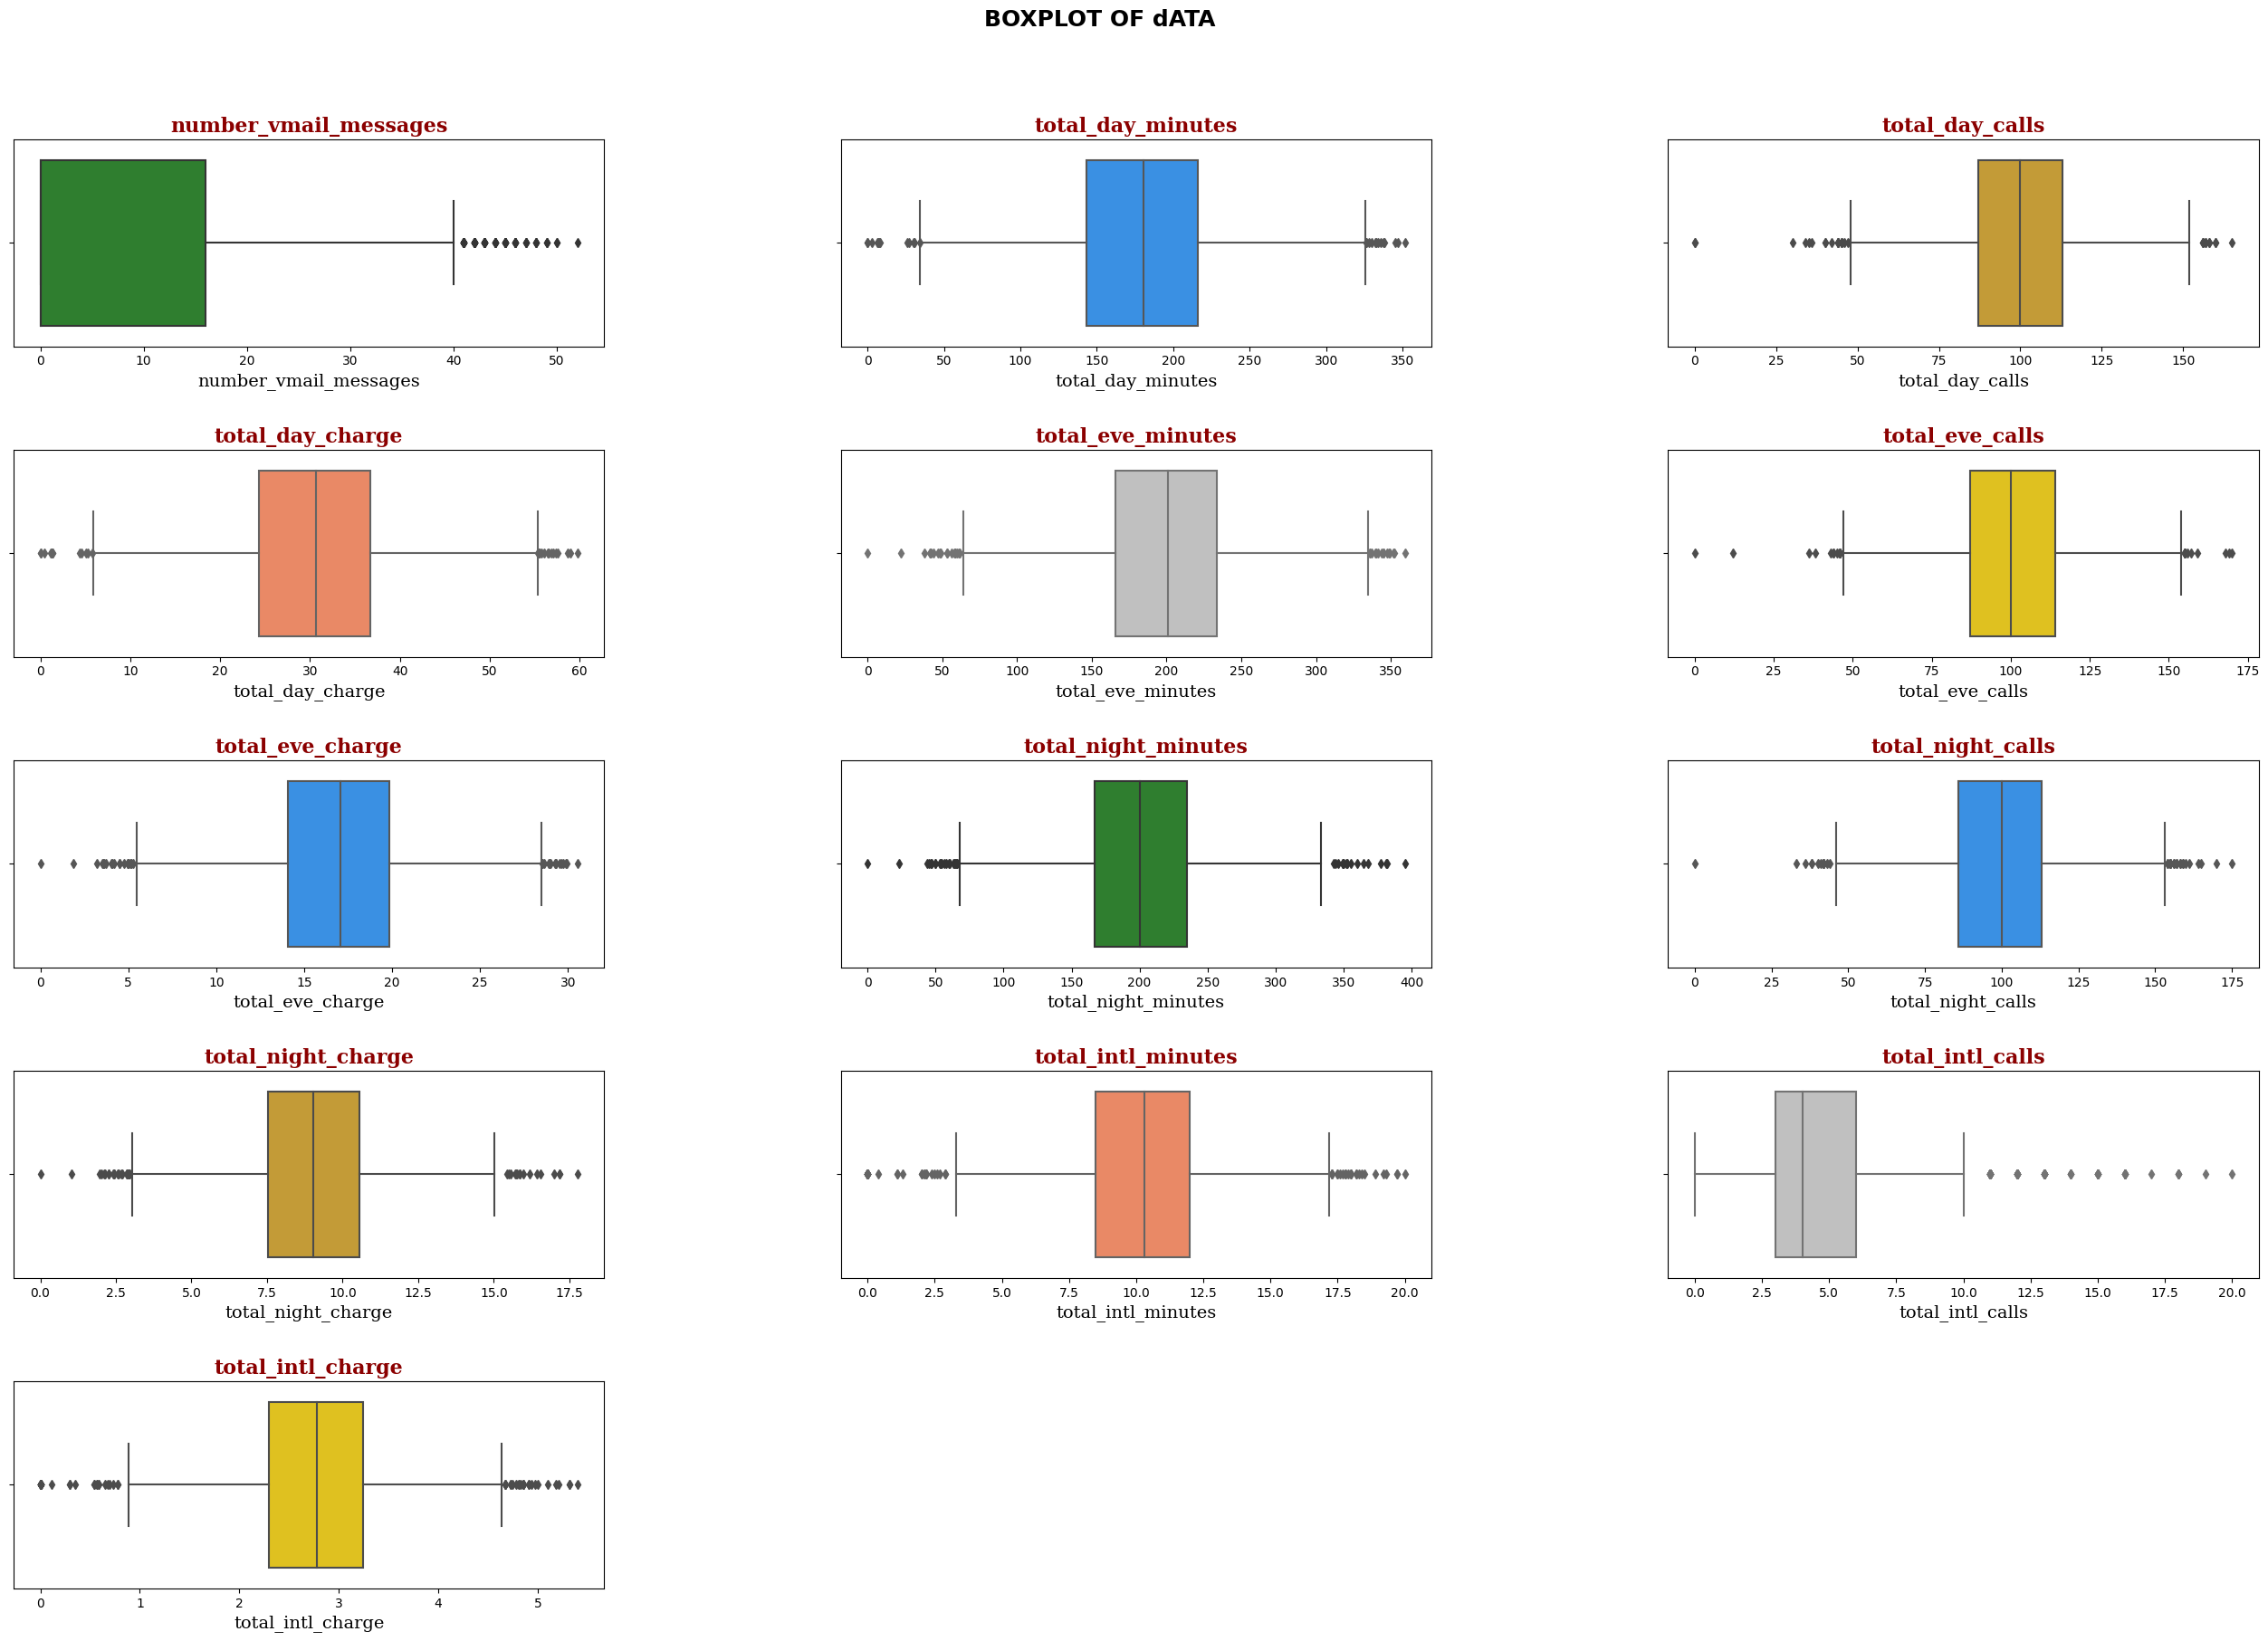

In [20]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)


Finding the IQR For Budget columns
-----

In [21]:
dict = {}
for col in Num_cols:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In [22]:
for col in Num_cols:
     print('There are total {} Customers data which {} are less than lower limit.'.format(len(df[df[col] < dict['lower_limit_' + col]] ) , col))
     print('There are total {} Customers data which {} are more than upper limit.'.format(len(df[df[col] > dict['upper_limit_' + col]] ) , col))

There are total 0 Customers data which number_vmail_messages are less than lower limit.
There are total 86 Customers data which number_vmail_messages are more than upper limit.
There are total 12 Customers data which total_day_minutes are less than lower limit.
There are total 13 Customers data which total_day_minutes are more than upper limit.
There are total 18 Customers data which total_day_calls are less than lower limit.
There are total 10 Customers data which total_day_calls are more than upper limit.
There are total 12 Customers data which total_day_charge are less than lower limit.
There are total 14 Customers data which total_day_charge are more than upper limit.
There are total 19 Customers data which total_eve_minutes are less than lower limit.
There are total 15 Customers data which total_eve_minutes are more than upper limit.
There are total 13 Customers data which total_eve_calls are less than lower limit.
There are total 11 Customers data which total_eve_calls are more t

In [23]:
for col in Num_cols:
         df[col] = np.where(
        df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df[col]  
        )
    )

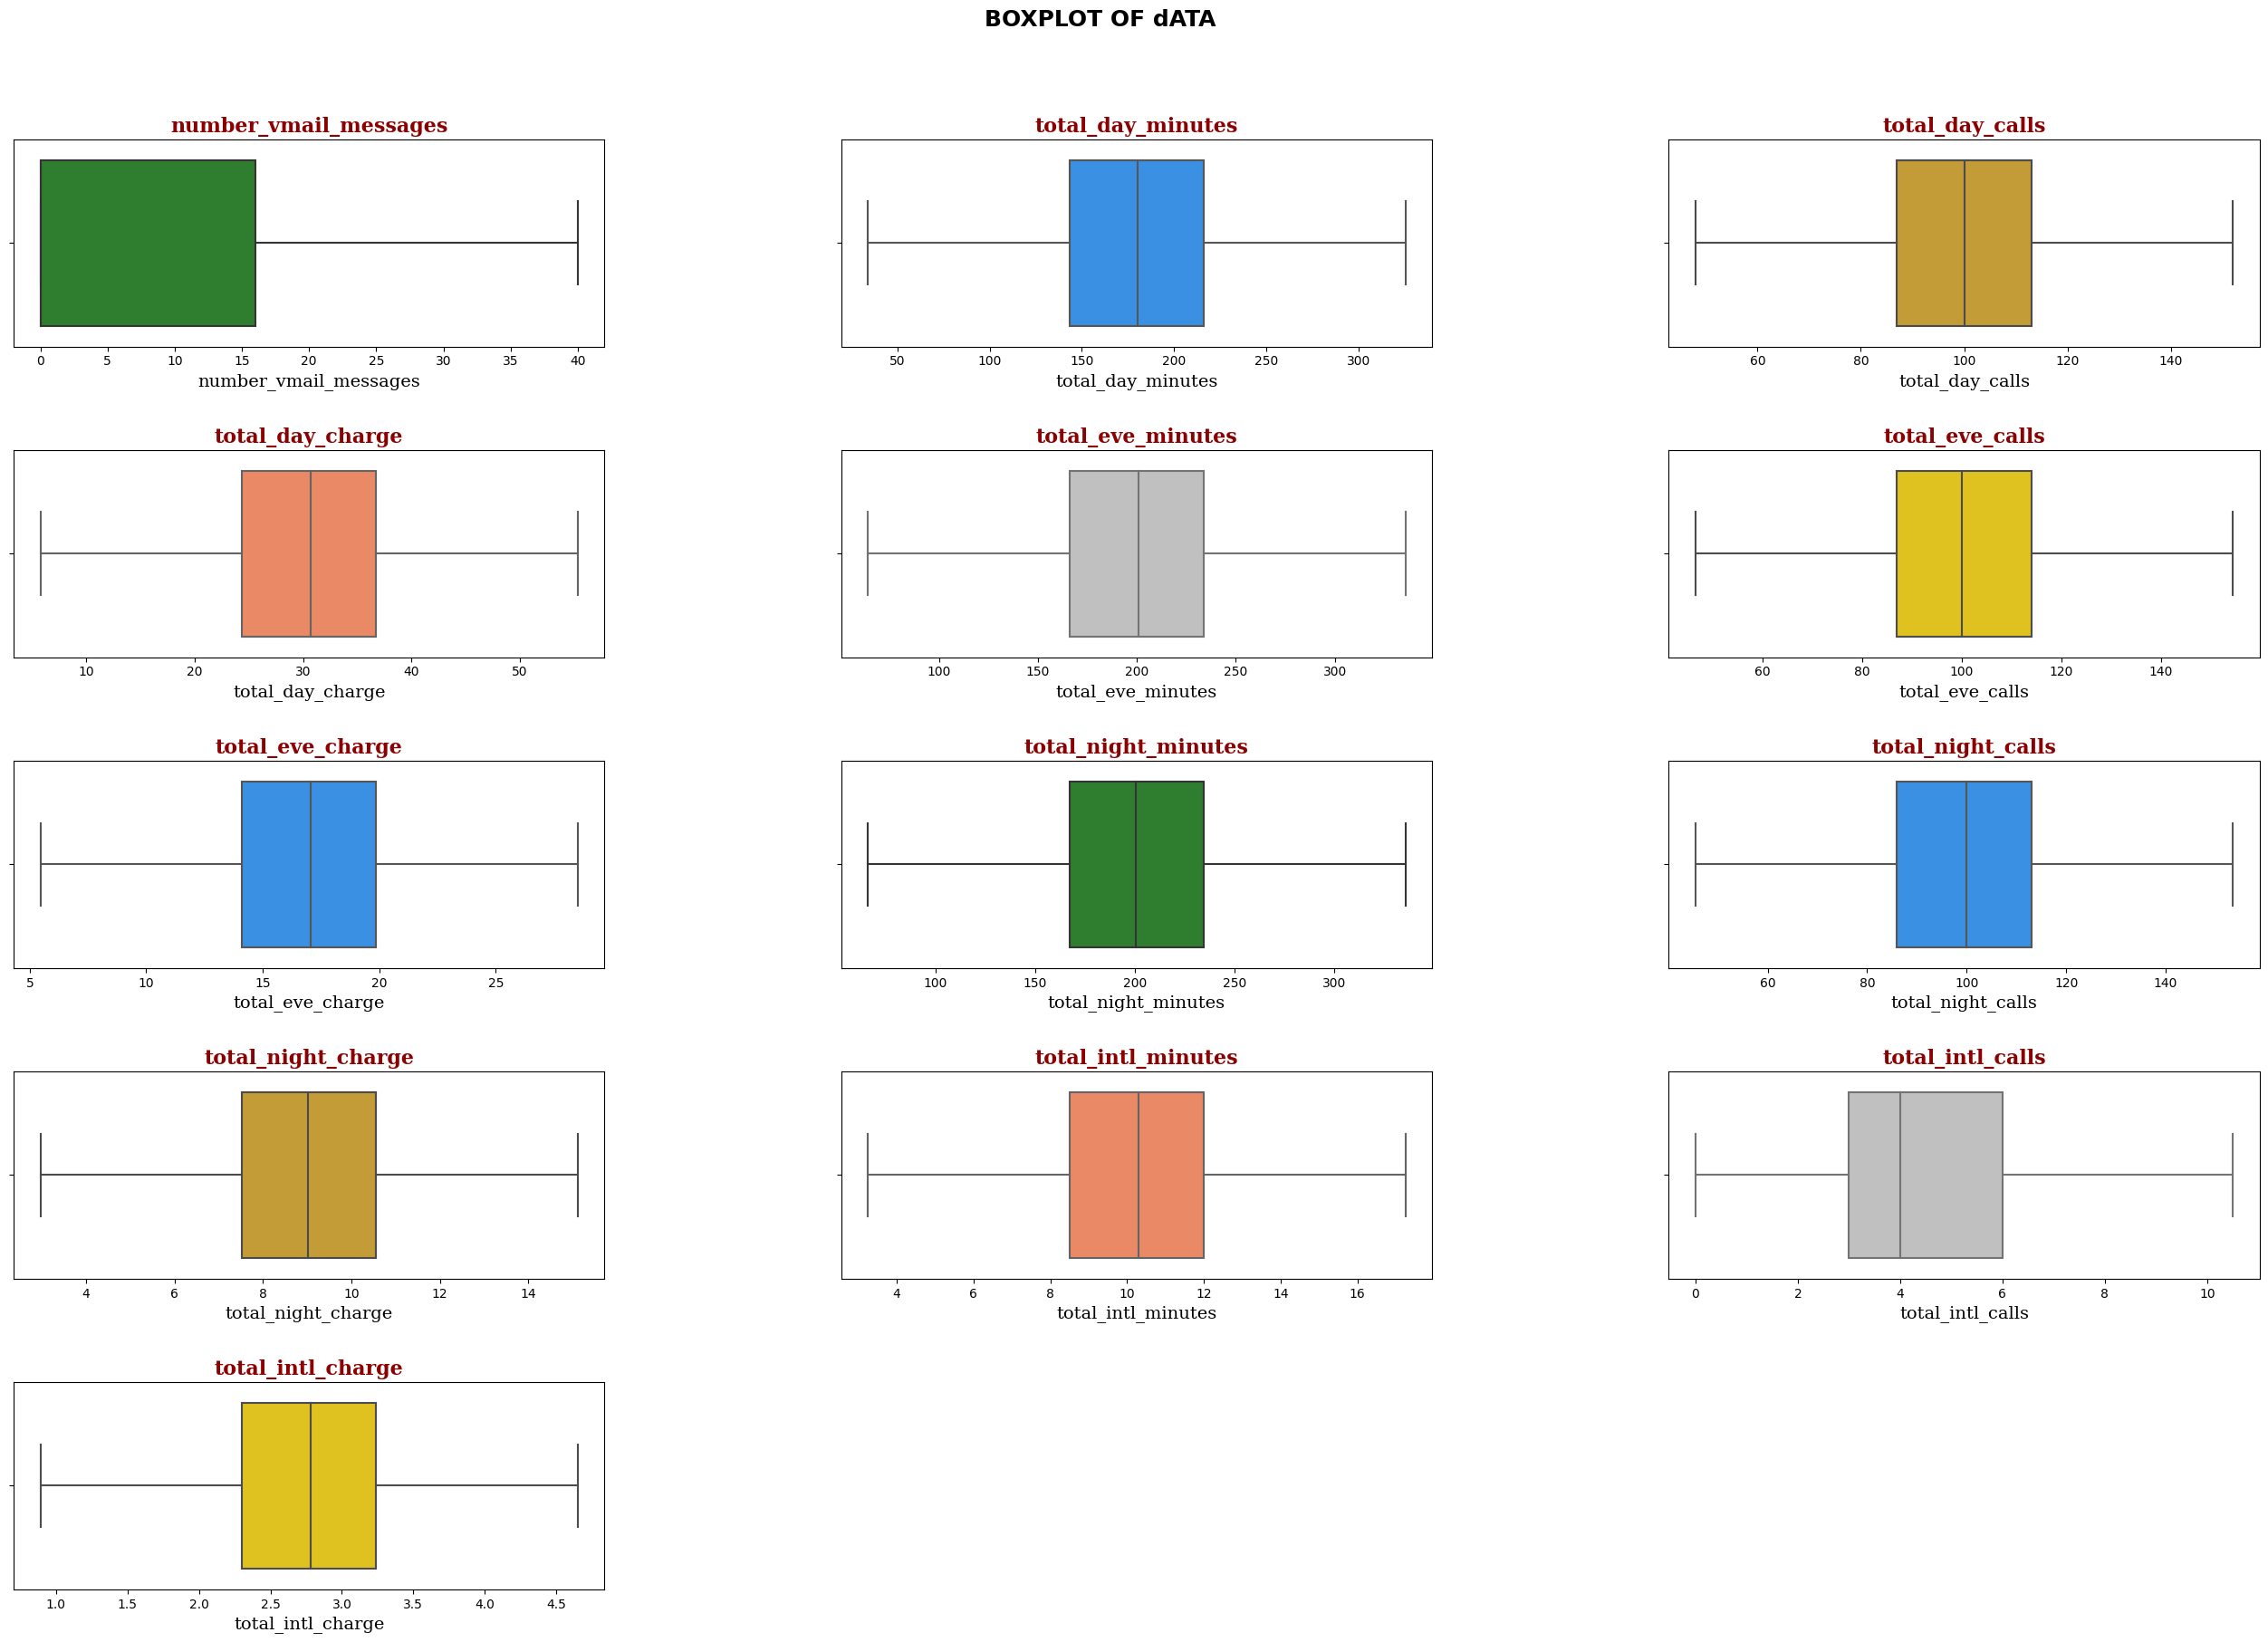

In [24]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

Features Engineering
----------

In [25]:
cat_cols=['voice_mail_plan','international_plan']
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in cat_cols:
          le = LabelEncoder()
          df[col] = le.fit_transform(df[col])
          label_encoders[col] = le

In [26]:
df['churn'] = df['churn'].map({'yes':1 , 'no':0})

In [27]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']


In [28]:
df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [29]:
df

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,0,1,26.0,13.7,3.0,3.70,1,0,611.50,329.0,55.540
1,0,0,0.0,12.2,5.0,3.29,0,0,527.20,328.0,59.000
2,1,0,0.0,6.6,7.0,1.78,2,0,560.45,248.0,65.215
3,1,0,0.0,10.1,3.0,2.73,3,0,501.90,356.0,49.360
4,0,1,24.0,7.5,7.0,2.03,3,0,766.35,314.0,75.175
...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,0.0,10.3,6.0,2.78,0,0,645.80,237.0,62.350
4246,0,0,0.0,11.5,6.0,3.11,3,0,495.30,260.0,49.770
4247,0,0,0.0,6.9,7.0,1.86,1,0,492.90,331.0,51.240
4248,0,1,40.0,9.9,5.0,2.67,2,0,756.20,369.0,72.420


Heatmap
---

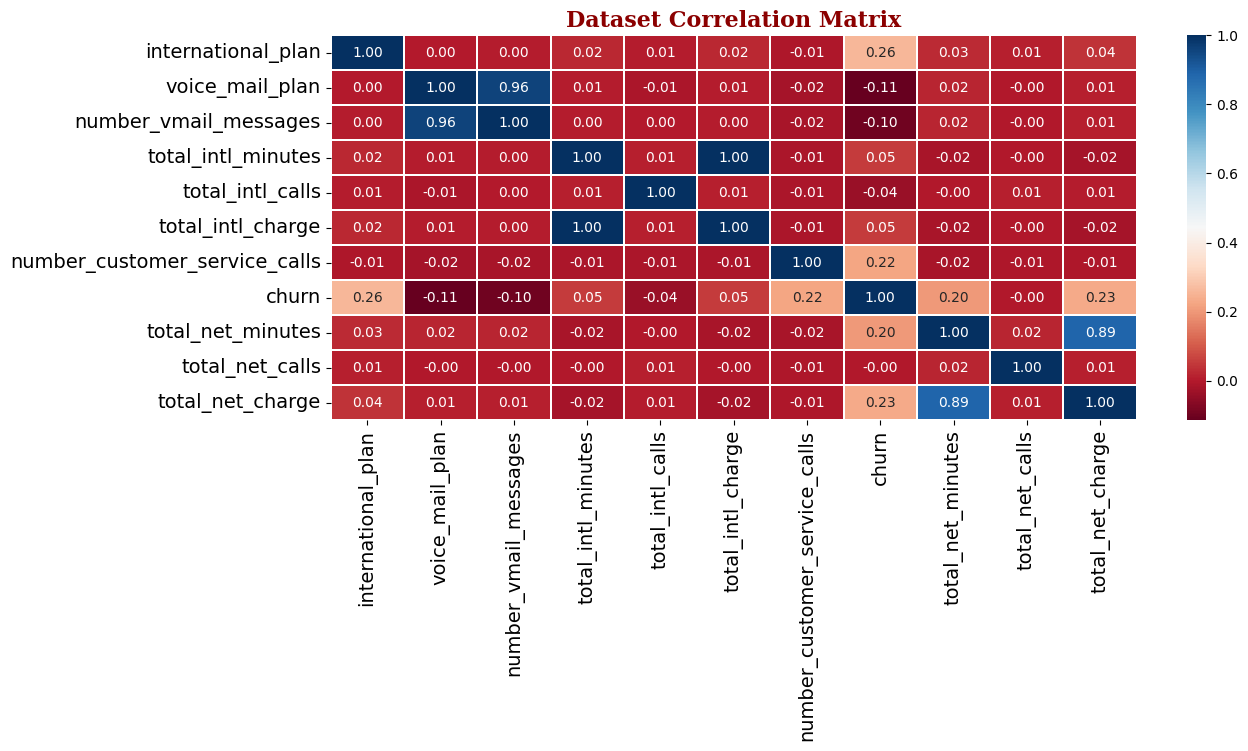

In [30]:
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
fig.show() 

Modelling
-----

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score , precision_score , recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [32]:
X = df.drop(['churn'], axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model_list = []
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list= [] 
cross_val_score_list = []


In [34]:
def Model_features(X_train , y_train , X_test , y_test , y_pred , classifier  , model_name):
     #     fig ,ax = plt.subplots(figsize = (7,6))
    accuracy , precision , recall , f1_s ,c_val_score= round(accuracy_score(y_test , y_pred) , 3) , round(precision_score(y_test, y_pred, average="micro")  ,3), round(recall_score(y_test , y_pred) ,3), round(f1_score(y_test , y_pred) , 3) , round(cross_val_score(classifier , X , y , cv=10 , scoring='accuracy').mean()  , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'f1  Score is :{f1_s}')
    print(f'cross val score is :{c_val_score}')
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_score_list.append(f1_s)
    cross_val_score_list.append(c_val_score)
    
#     print(f'f1  Score is :{round(specificity_score(y_test , y_pred) , 3)}')
    print(metrics.classification_report(y_test, y_pred)) 

In [35]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = round(pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False) ,2 )
    
    top_weights_selected = weights[:5]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 5 Features')
    ax = top_weights_selected.plot(kind="bar")
    ax.bar_label(ax.containers[0])
    
    return print("")

Logistic Regression
---

In [36]:
#logistic regression
model_lr= LogisticRegression(random_state=0)  
model_lr.fit(X_train, y_train) 
y_pred = model_lr.predict(X_test)
lr_accuracy=model_lr.score(X_test , y_test)
lr_accuracy

0.8588235294117647

Accuracy Score is :0.859
Precision Score is :0.859
Recall Score is :0.178
f1  Score is :0.277
cross val score is :0.862
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       721
           1       0.62      0.18      0.28       129

    accuracy                           0.86       850
   macro avg       0.75      0.58      0.60       850
weighted avg       0.83      0.86      0.82       850




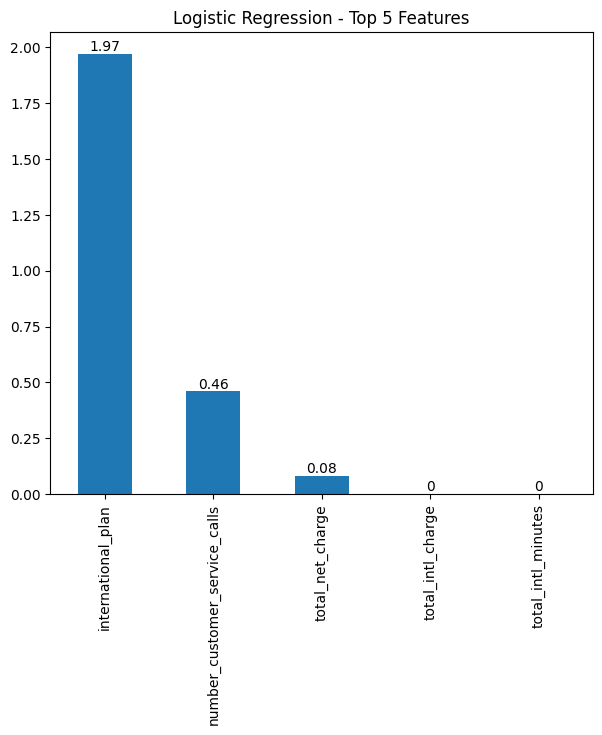

In [37]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , model_lr , "Logistic Reegression")   
feature_weights(X_train , model_lr , "Logistic Regression")

Support Vector Machine
-----

In [38]:
svm = SVC(kernel='rbf', probability=True) 
svm.fit(X_train,y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred = svm.predict(X_test)
svm_accuracy=svm.score(X_test , y_test)
svm_accuracy  

0.8482352941176471

In [39]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , svm , "Support Vector Machine")   

Accuracy Score is :0.848
Precision Score is :0.848
Recall Score is :0.0
f1  Score is :0.0
cross val score is :0.859
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       721
           1       0.00      0.00      0.00       129

    accuracy                           0.85       850
   macro avg       0.42      0.50      0.46       850
weighted avg       0.72      0.85      0.78       850



DecisionTreeClassifier
----

In [40]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc_accuracy=dtc.score(X_test , y_test)
dtc_accuracy

0.9529411764705882

In [41]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , dtc , "Decision Tree Classifier")   


Accuracy Score is :0.953
Precision Score is :0.953
Recall Score is :0.845
f1  Score is :0.845
cross val score is :0.952
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       721
           1       0.84      0.84      0.84       129

    accuracy                           0.95       850
   macro avg       0.91      0.91      0.91       850
weighted avg       0.95      0.95      0.95       850



Naive-Bayes Classifier
------ 

In [56]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
nb_clf_accuracy = nb_clf.score(X_test,y_test)
nb_clf_accuracy

0.8717647058823529

In [58]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , dtc , "Naive-Bayes Classifier")   

Accuracy Score is :0.872
Precision Score is :0.872
Recall Score is :0.519
f1  Score is :0.551
cross val score is :0.952
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       721
           1       0.59      0.52      0.55       129

    accuracy                           0.87       850
   macro avg       0.75      0.73      0.74       850
weighted avg       0.87      0.87      0.87       850



Random Forest Classifier
-----

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_accuracy=rf.score(X_test , y_test)
rf_accuracy

0.9752941176470589

In [43]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , rf , "Random Forest Classifier")   

Accuracy Score is :0.975
Precision Score is :0.975
Recall Score is :0.868
f1  Score is :0.914
cross val score is :0.975
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       721
           1       0.97      0.87      0.91       129

    accuracy                           0.98       850
   macro avg       0.97      0.93      0.95       850
weighted avg       0.98      0.98      0.97       850



Compairing accuracy, precision, f1 score, recall of all the ML models used
-----

In [59]:
dict = {'Model':model_list, 'Accuracy':accuracy_list , 'Precision':precision_list , 
        'f1_score':f1_score_list ,'Recall':recall_list ,'Cross_Val_Score':cross_val_score_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy')
model_df 

,Model,Accuracy,Precision,f1_score,Recall,Cross_Val_Score
3,Random Forest Classifier,0.975,0.975,0.914,0.868,0.975
2,Decision Tree Classifier,0.953,0.953,0.845,0.845,0.952
4,Naive-Bayes Classifier,0.872,0.872,0.551,0.519,0.952
0,Logistic Reegression,0.859,0.859,0.277,0.178,0.862
1,Support Vector Machine,0.848,0.848,0.000,0.000,0.859


Accuracy Comparison
-------

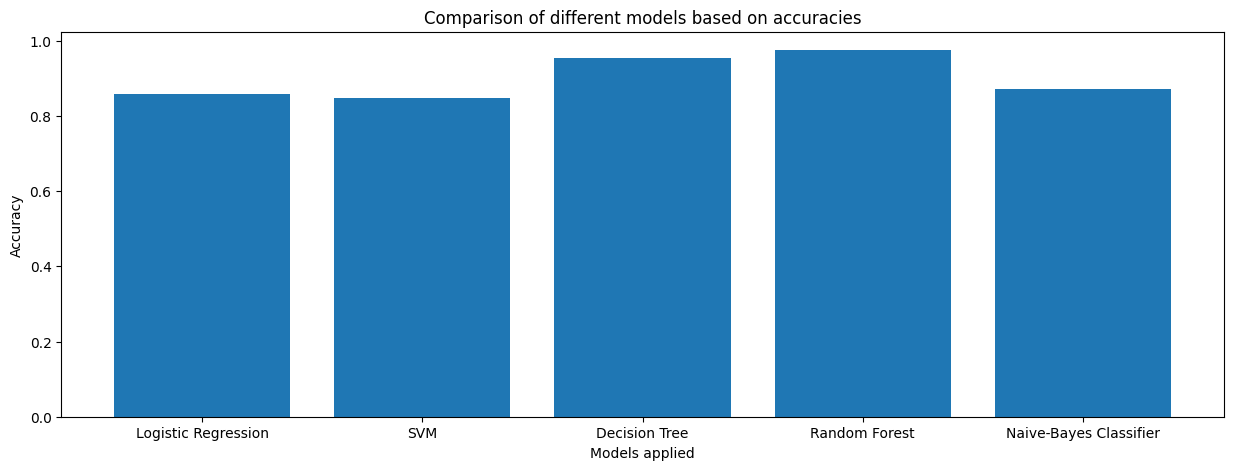

In [63]:
models = ['Logistic Regression','SVM','Decision Tree','Random Forest','Naive-Bayes Classifier']
plt.figure(figsize=(15,5))
plt.title("Comparison of different models based on accuracies")
plt.xlabel("Models applied")
plt.ylabel("Accuracy")
plt.bar(models,accuracy_list)
plt.show()

Precision Comparison
-----------

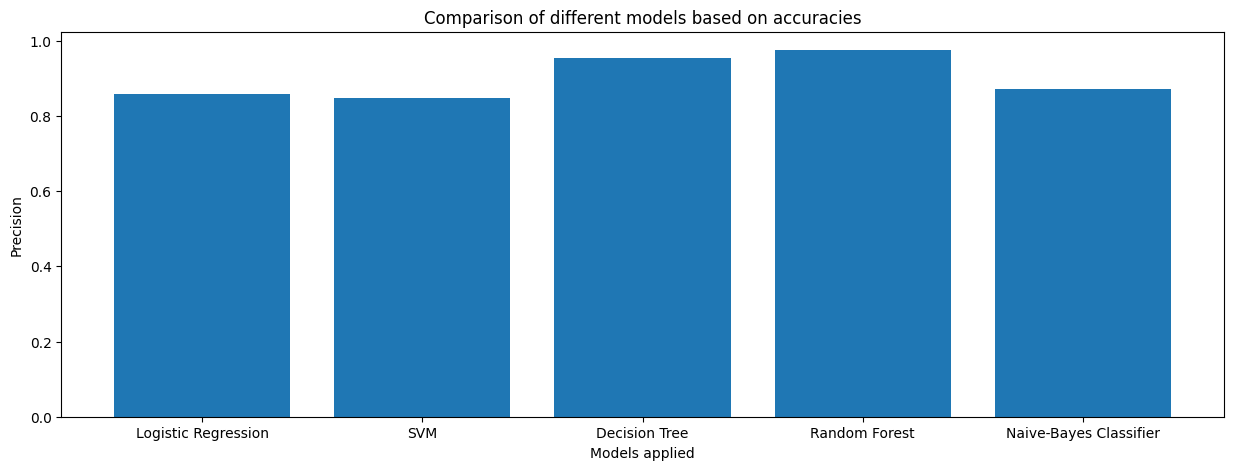

In [66]:
models = ['Logistic Regression','SVM','Decision Tree','Random Forest','Naive-Bayes Classifier']
plt.figure(figsize=(15,5))
plt.title("Comparison of different models based on accuracies")
plt.xlabel("Models applied")
plt.ylabel("Precision")
plt.bar(models,precision_list)
plt.show()

F1 Score Comparison
-------

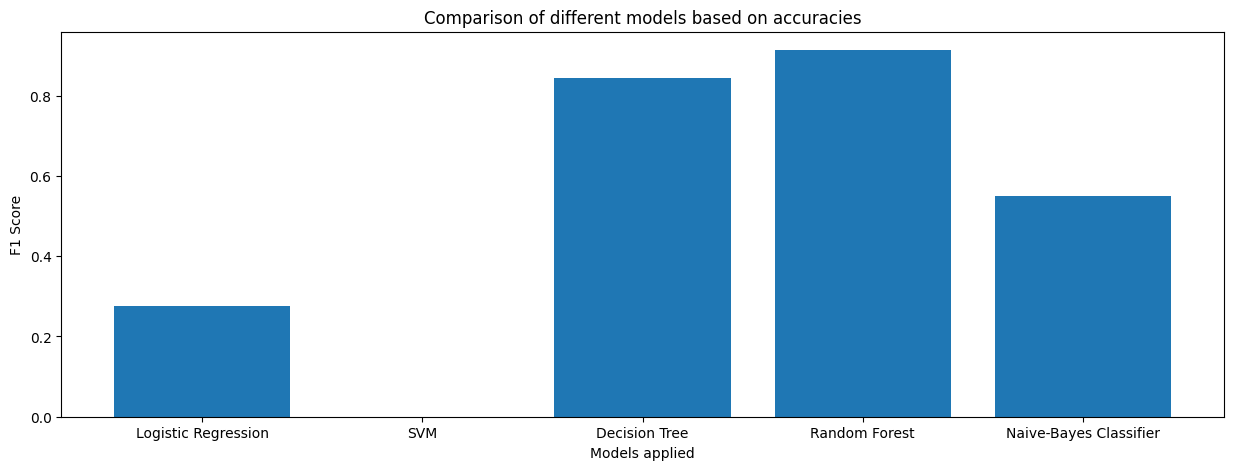

In [65]:
models = ['Logistic Regression','SVM','Decision Tree','Random Forest','Naive-Bayes Classifier']
plt.figure(figsize=(15,5))
plt.title("Comparison of different models based on accuracies")
plt.xlabel("Models applied")
plt.ylabel("F1 Score")
plt.bar(models,f1_score_list)
plt.show()

Recall Comparison
----

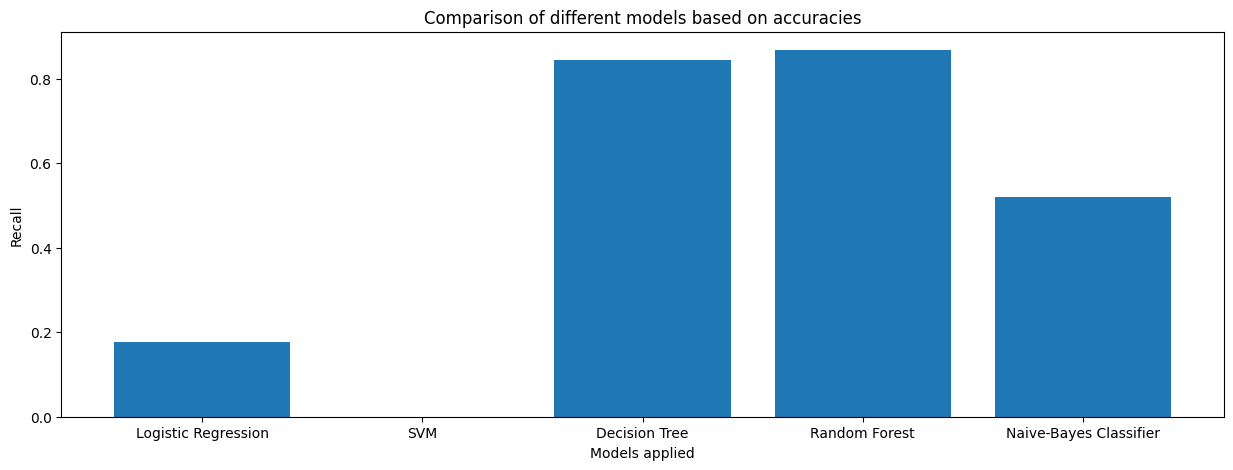

In [67]:
models = ['Logistic Regression','SVM','Decision Tree','Random Forest','Naive-Bayes Classifier']
plt.figure(figsize=(15,5))
plt.title("Comparison of different models based on accuracies")
plt.xlabel("Models applied")
plt.ylabel("Recall")
plt.bar(models,recall_list)
plt.show()

Cross Validation Score Comparison
---------

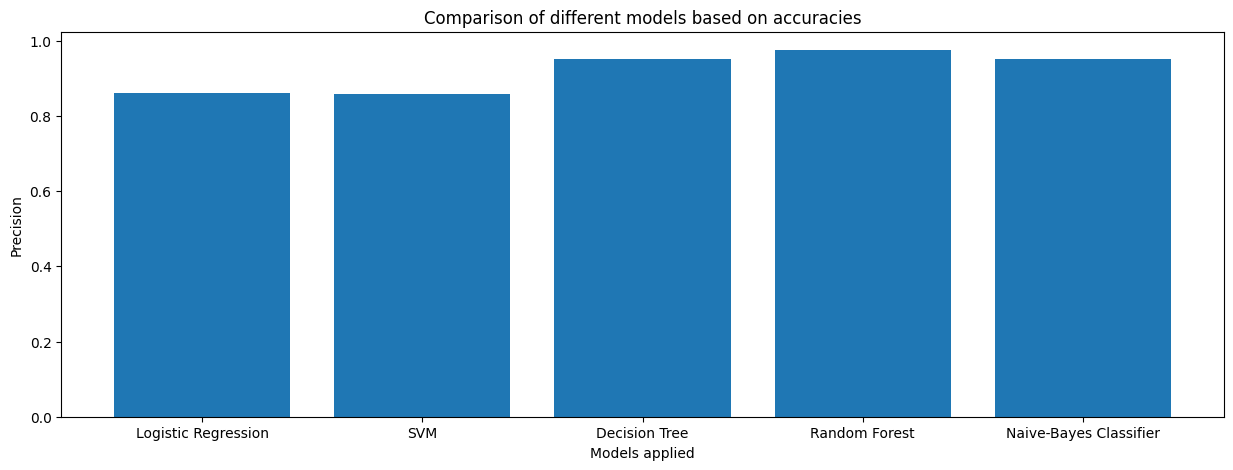

In [68]:
models = ['Logistic Regression','SVM','Decision Tree','Random Forest','Naive-Bayes Classifier']
plt.figure(figsize=(15,5))
plt.title("Comparison of different models based on accuracies")
plt.xlabel("Models applied")
plt.ylabel("Precision")
plt.bar(models,cross_val_score_list)
plt.show()

Selecting Random Forest Model for prediction
----

In [45]:
import streamlit as st
import joblib
st.write("Model Accuracy",rf.score(X_test , y_test))

2023-04-25 21:16:01.739 
  command:

    streamlit run C:\Users\manes\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [46]:
joblib.dump(rf,'churn_model.pkl')
joblib.dump(label_encoders, 'encoders.pkl')

['encoders.pkl']

In [47]:
df['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [50]:
for col in df.columns:
    print(col,"min : ",df[col].max(),"max : ",df[col].max())

international_plan min :  1 max :  1
voice_mail_plan min :  1 max :  1
number_vmail_messages min :  40.0 max :  40.0
total_intl_minutes min :  17.25 max :  17.25
total_intl_calls min :  10.5 max :  10.5
total_intl_charge min :  4.65 max :  4.65
number_customer_service_calls min :  9 max :  9
churn min :  1 max :  1
total_net_minutes min :  876.9 max :  876.9
total_net_calls min :  407.0 max :  407.0
total_net_charge min :  89.8475 max :  89.8475
